In [ ]:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 55.3 MB/s eta 0:00:00
 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

ValueError: mount failed

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
base_dir = '/content/drive/MyDrive/chest_xray'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Set parameters
img_height, img_width = 150, 150
batch_size = 32
num_classes = 2  # Normal and Pneumonia

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)


Found 5236 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class
])



In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10  # Increase epochs for better training
)

Epoch 1/10
163/163 [==============================] - 420s 2s/step - loss: 0.5087 - accuracy: 0.7571
Epoch 2/10
163/163 [==============================] - 335s 2s/step - loss: 0.3503 - accuracy: 0.8401
Epoch 3/10
163/163 [==============================] - 342s 2s/step - loss: 0.2873 - accuracy: 0.8738
Epoch 4/10
163/163 [==============================] - 331s 2s/step - loss: 0.2452 - accuracy: 0.8974
Epoch 5/10
163/163 [==============================] - 343s 2s/step - loss: 0.2532 - accuracy: 0.8935
Epoch 6/10
163/163 [==============================] - 348s 2s/step - loss: 0.2240 - accuracy: 0.9045
Epoch 7/10
163/163 [==============================] - 335s 2s/step - loss: 0.2110 - accuracy: 0.9080
Epoch 8/10
163/163 [==============================] - 341s 2s/step - loss: 0.2048 - accuracy: 0.9160
Epoch 9/10
163/163 [==============================] - 338s 2s/step - loss: 0.1968 - accuracy: 0.9141
Epoch 10/10
163/163 [==============================] - 337s 2s/step - loss: 0.1811 - accura

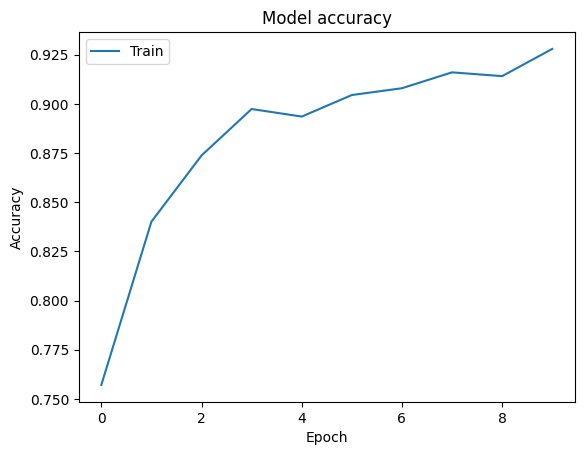

In [ ]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:

# Save the model
model.save('chest2_xray_model.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


We Need to Extract and Save Weights for Each Layer into the drive for easy
access and reference


In [ ]:
import numpy as np

# Get all trainable weights
weights = model.get_weights()

# Conv1: Conv2D(32 filters) + Bias
np.save('/content/drive/MyDrive/chest_xray/conv1_weights.npy', weights[0])  # Kernel
np.save('/content/drive/MyDrive/chest_xray/conv1_bias.npy', weights[1])     # Bias

# Conv2: Conv2D(64 filters)
np.save('/content/drive/MyDrive/chest_xray/conv2_weights.npy', weights[2])
np.save('/content/drive/MyDrive/chest_xray/conv2_bias.npy', weights[3])

# Conv3: Conv2D(128 filters)
np.save('/content/drive/MyDrive/chest_xray/conv3_weights.npy', weights[4])
np.save('/content/drive/MyDrive/chest_xray/conv3_bias.npy', weights[5])

# Dense Layer
np.save('/content/drive/MyDrive/chest_xray/dense_weights.npy', weights[6])
np.save('/content/drive/MyDrive/chest_xray/dense_bias.npy', weights[7])

We need to Convert .npy to .bin because it is useful for FHE libraries during the computations



In [ ]:
# Example: Save conv1_weights as .bin
weights_conv1 = np.load('/content/drive/MyDrive/chest_xray/conv1_weights.npy')
weights_conv1.tofile('/content/drive/MyDrive/chest_xray/conv1_weights.bin')

# Repeat for others:
weights_conv2 = np.load('/content/drive/MyDrive/chest_xray/conv2_weights.npy')
weights_conv2.tofile('/content/drive/MyDrive/chest_xray/conv2_weights.bin')

weights_conv3 = np.load('/content/drive/MyDrive/chest_xray/conv3_weights.npy')
weights_conv3.tofile('/content/drive/MyDrive/chest_xray/conv3_weights.bin')

weights_dense = np.load('/content/drive/MyDrive/chest_xray/dense_weights.npy')
weights_dense.tofile('/content/drive/MyDrive/chest_xray/dense_weights.bin')

In [ ]:
# Make the prediction
prediction = model.predict(xray_array)

# Interpret the prediction
if prediction[0][0] >= 0.5:  # Adjust based on your model's output shape
    result = 'Pneumonia'
else:
    result = 'Normal'